In [1]:
import pandas as pd



df = pd.read_csv("normiranci23.csv", thousands=",")

df = df.rename(columns={
    "Prihodki, ugotovljeni na podlagi računovodskih predpisov \n(P01 obračun DohDej), v evrih s centi": "Prihodki",
    'SKD naziv oddelka ': 'SKD naziv oddelka'
})

df["Prihodki"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86055 entries, 0 to 86054
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Leto                                    86055 non-null  int64  
 1   Vrsta odhodkov                          86055 non-null  object 
 2   Razosebljena identifikacijska številka  86055 non-null  int64  
 3   Naziv vrste org. oblike                 85961 non-null  object 
 4   Naziv regije                            84754 non-null  object 
 5   Obdobje OD                              86055 non-null  object 
 6   Obdobje DO                              86055 non-null  object 
 7   SKD oddelek                             86055 non-null  int64  
 8   SKD naziv oddelka                       86051 non-null  object 
 9   Prihodki                                86055 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 6.6+ MB


In [2]:
df.head()
df.columns[8]

'SKD naziv oddelka'

In [15]:

df.groupby("SKD naziv oddelka")["Prihodki"].agg(["count", "min", "max", "mean", "median"])

,count,min,max,mean,median
SKD naziv oddelka,,,,,
"Arhitekturno in tehnično projektiranje, tehnično preizkušanje in analiziranje",3712,0.00,250967.00,32941.514992,26473.925
Dajanje v najem in zakup,302,0.00,108095.16,21611.390662,13727.500
Dejavnost eksteritorialnih organizacij in teles,4,1737.28,39741.27,17759.387500,14779.500
"Dejavnost javne uprave in obrambe, dejavnost obvezne socialne varnosti",60,0.00,85885.00,18610.886667,12321.555
"Dejavnost knjižnic, arhivov, muzejev in druge kulturne dejavnosti",27,0.00,49770.25,15691.465926,14872.900
...,...,...,...,...,...
"Zbiranje, prečiščevanje in distribucija vode",1,17308.37,17308.37,17308.370000,17308.370
Zdravstvo,3242,0.00,368626.04,28869.611647,19198.645
Znanstvena raziskovalna in razvojna dejavnost,401,0.00,147378.73,27540.151970,19719.650


<Axes: ylabel='Frequency'>

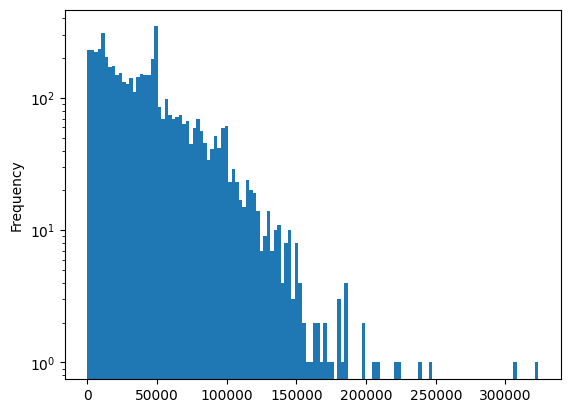

In [4]:

# TODO: create histogram for each value of "SKD naziv oddelka"
df[df["SKD naziv oddelka"] == "Računalniško programiranje, svetovanje in druge s tem povezane dejavnosti"]["Prihodki"][df["Prihodki"] > 0].plot.hist(bins=128, log=True)

In [5]:
df2= df.pivot(columns="SKD oddelek", values="Prihodki")
df2.head()

SKD oddelek,10,11,12,13,14,15,16,17,18,20,...,89,90,91,92,93,94,95,96,98,99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950535.71,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,666637.79,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
        <Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>,
        <Axes: title={'center': '28'}>],
       [<Axes: title={'center': '29'}>, <Axes: title={'center': '30'}>,
        <Axes: title={'center': '31'}>, <Axes: title={'center': '32'}>,
        <Axes: title={'center': '33'}>, <Axes: title={'center': '35'}>,
        <Axes: title={'center': '36'}>, <Axes: title={'center': '37'}>,
        <Axes: title={'center': '38'}>],
       [<Axes

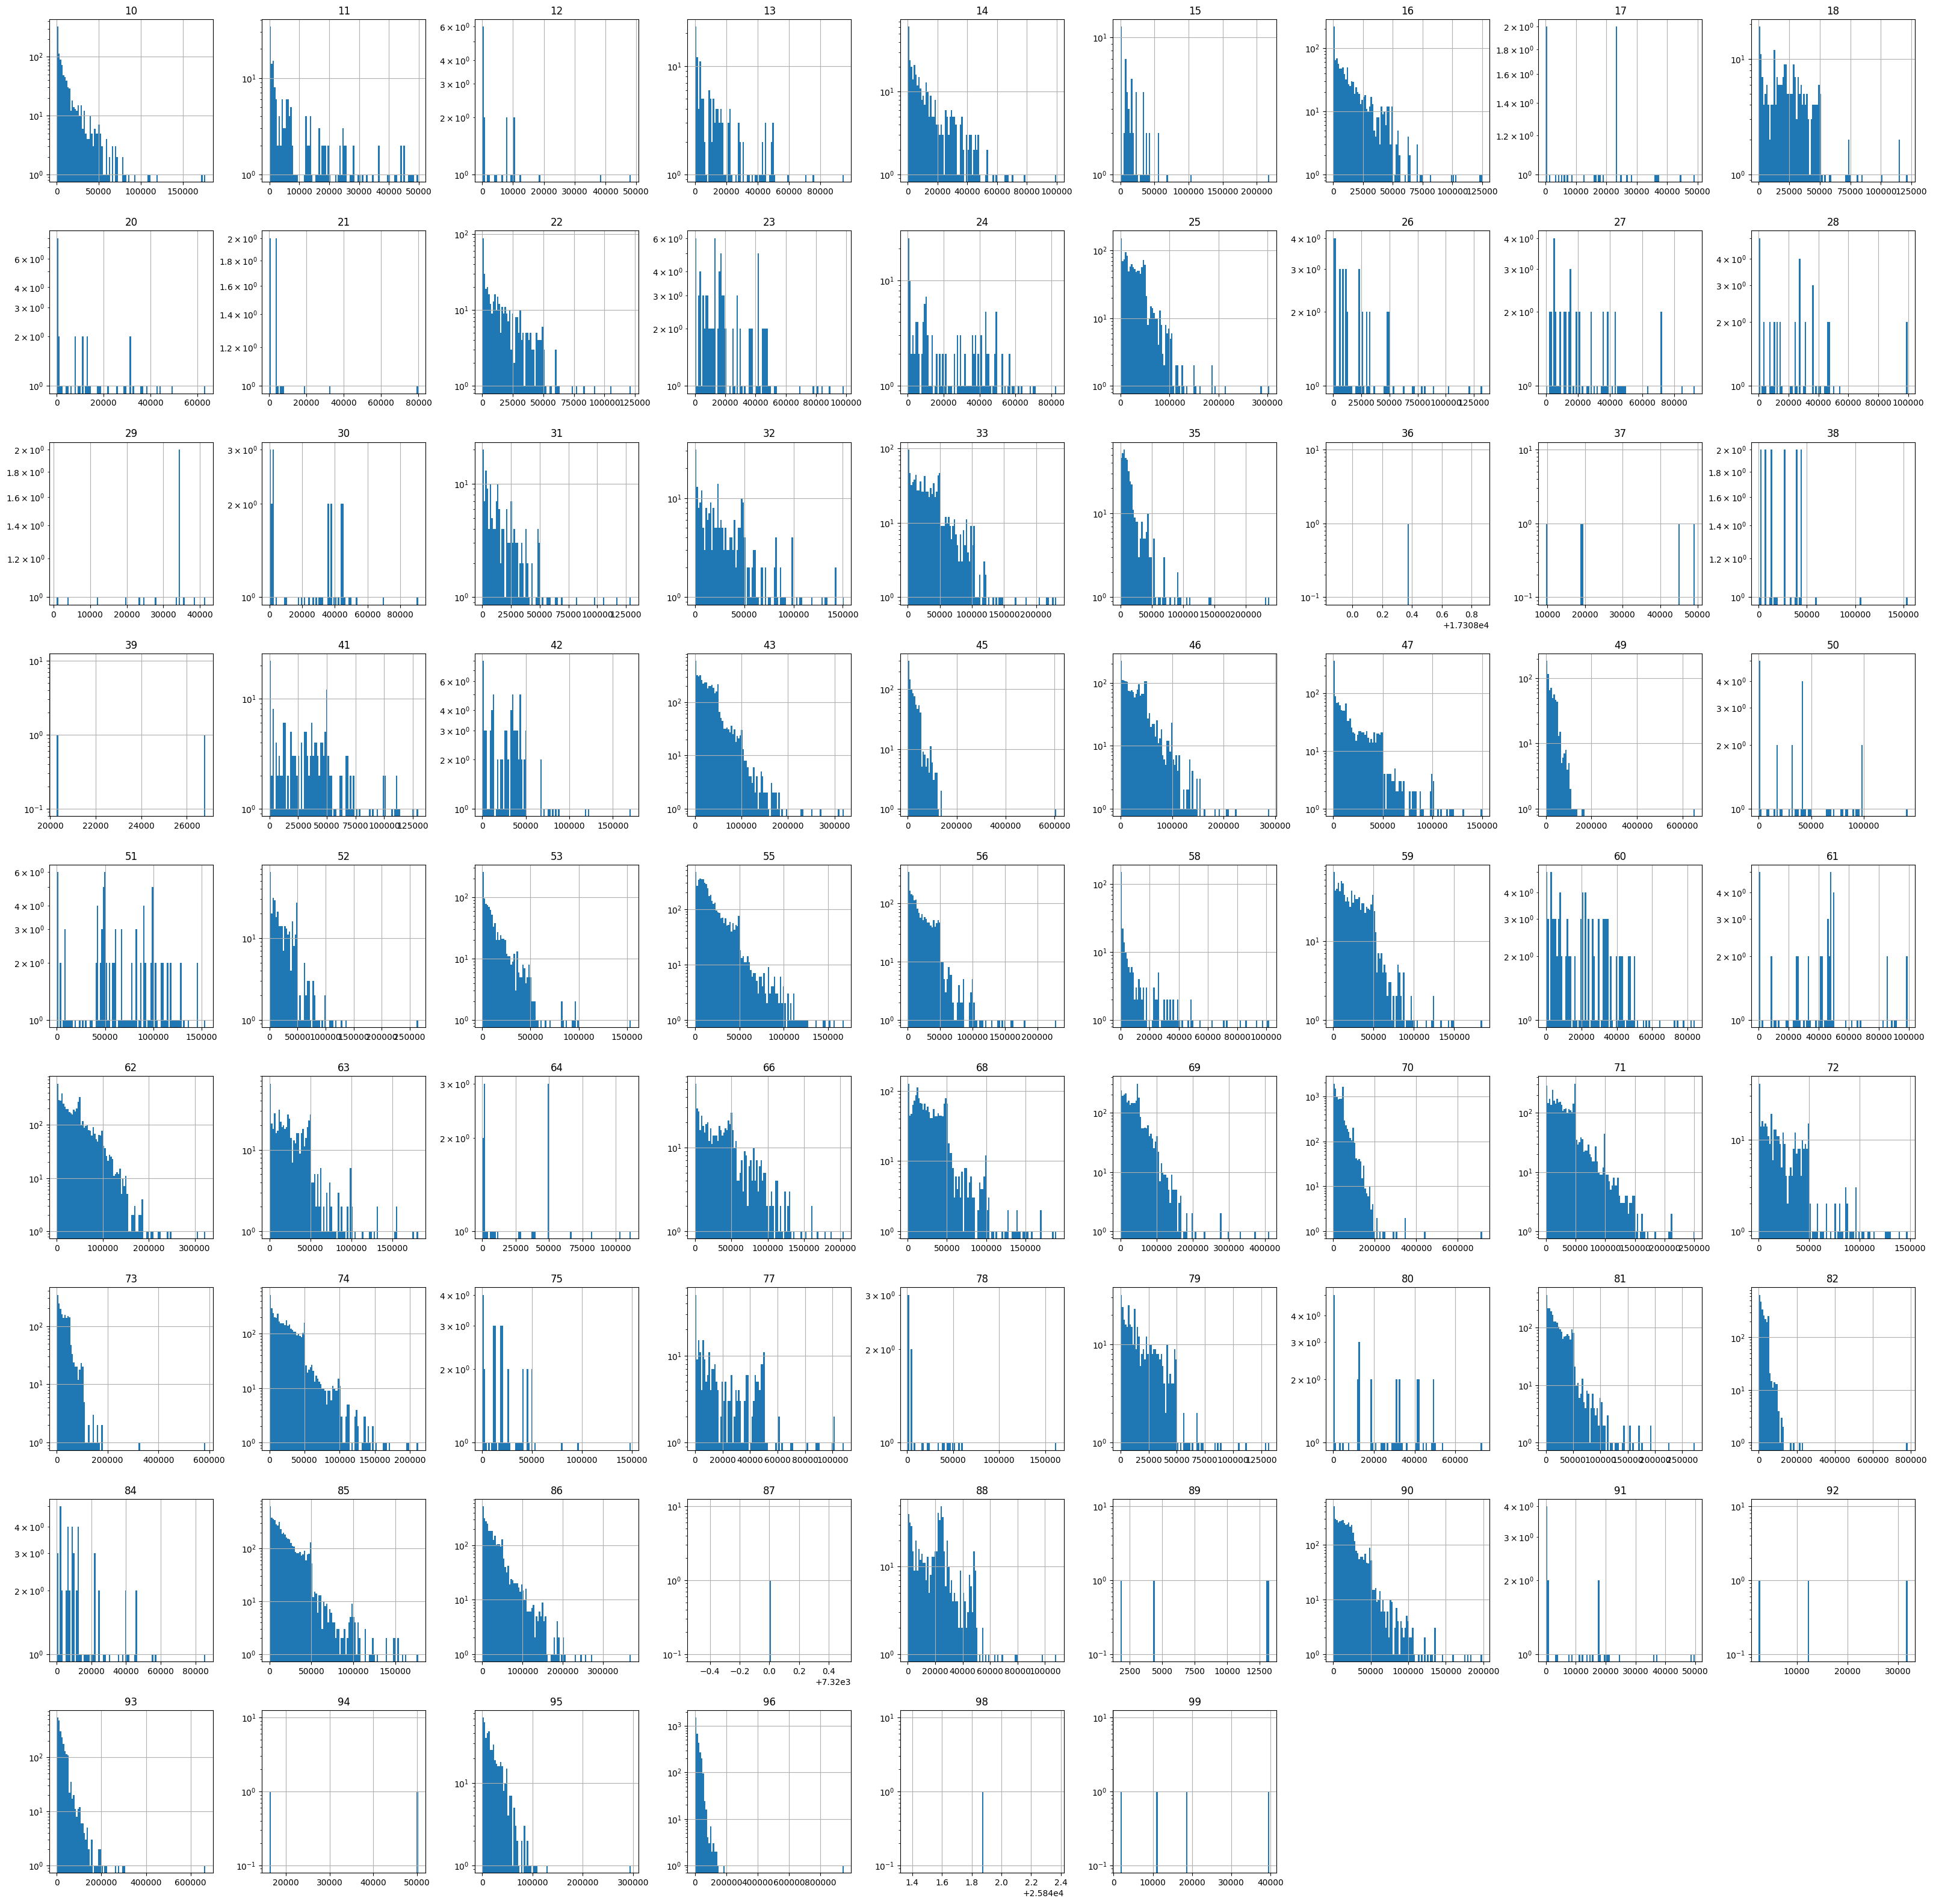

In [38]:
df2.hist(bins=100, figsize=(40, 40), log=True)

In [31]:
pd.options.display.max_rows = None
df[df["Prihodki"] > 60000].groupby("SKD naziv oddelka")["Prihodki"].agg(["count", "mean", "median", "max"]).round(2).sort_values('mean', ascending=False)

,count,mean,median,max
SKD naziv oddelka,,,,
Zaposlovalne dejavnosti,1,162293.30,162293.30,162293.30
"Proizvodnja usnja, usnjenih in sorodnih izdelkov",3,130454.42,104734.00,218414.06
"Zbiranje in odvoz odpadkov ter ravnanje z njimi, pridobivanje sekundarnih surovin",2,130137.52,130137.52,154227.65
Veterinarstvo,3,108076.65,95686.63,149352.01
"Oskrba z električno energijo, plinom in paro",19,104421.40,92051.32,236932.18
Športne in druge dejavnosti za prosti čas,159,103372.05,82789.33,666637.79
Druge storitvene dejavnosti,57,101079.19,74840.25,950535.71
Proizvodnja drugih strojev in naprav,2,99144.44,99144.44,99586.18
Zdravstvo,373,98669.05,87983.18,368626.04


In [30]:
df[df["Prihodki"] > 0].groupby("SKD naziv oddelka")["Prihodki"].agg(["count", "mean", "median", "min", "max"]).round(2).sort_values('mean', ascending=False)

,count,mean,median,min,max
SKD naziv oddelka,,,,,
Zračni promet,118,69441.06,66650.38,105.66,153892.32
Vodni promet,40,53282.56,44247.52,2275.17,141682.07
Telekomunikacijske dejavnosti,56,44079.02,44901.58,143.88,99202.86
"Računalniško programiranje, svetovanje in druge s tem povezane dejavnosti",5293,41645.12,36115.00,0.77,323335.74
Pomožne dejavnosti za finančne in zavarovalniške storitve,643,41580.86,36322.58,10.15,204545.60
Pravne in računovodske dejavnosti,3030,41290.34,37099.69,52.84,412070.40
Gradnja stavb,181,39034.25,36965.00,0.01,129707.70
Popravila in montaža strojev in naprav,924,37070.76,30774.17,0.01,231643.00
Gradnja inženirskih objektov,83,35499.36,33946.65,170.60,170740.48
